## Assignment 1:

In [32]:
# Load the packages
import pandas as pd
import numpy as np
import bokeh
import matplotlib.pyplot as plt
import re
import random

In [33]:
## Load the data
mpg = pd.read_csv('/Users/yry/Documents/auto-mpg.csv')
mpg.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


### 1. Get the threshold to seperate the cars into 4 groups based on mpg.

In [34]:
mpg.mpg.describe()

count    392.000000
mean      23.445918
std        7.805007
min        9.000000
25%       17.000000
50%       22.750000
75%       29.000000
max       46.600000
Name: mpg, dtype: float64

In [35]:
levels = ['low', 'medium', 'high', 'very_high']
cats = pd.qcut(mpg.mpg, 4, labels = levels)
cats.value_counts()

high         101
low           99
medium        97
very_high     95
Name: mpg, dtype: int64

In [36]:
mpg['mpg_level'] = cats
mpg.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,mpg_level
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,medium
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,low
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,medium
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,low
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,low


### 2. Get the scatter matrix.

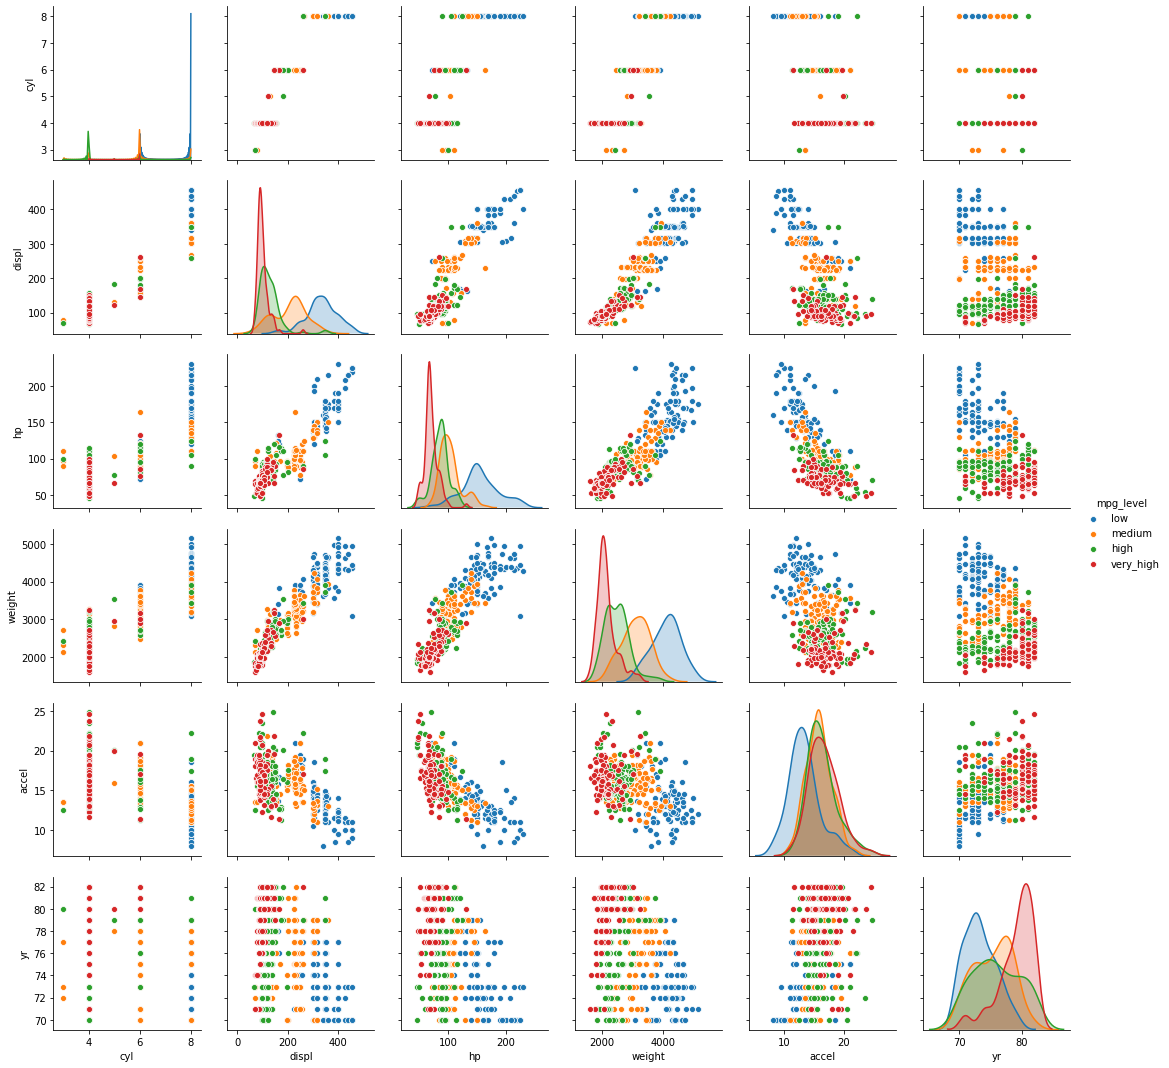

In [37]:
import seaborn as sns

sns.pairplot(mpg.loc[:,['cyl', 'displ', 'hp', 'weight', 'accel', 'yr', 'mpg_level']], hue = 'mpg_level')

### 3. Build my linear model solver.

In [38]:
## Define my lm_solver:

class lm_solver:
    """
    This is my own built linear regression solver class to deal with specify type of linear      regression.

    This solver can only deal with a single variable but have multiple polynomial terms in       the model.
    """

    def __init__(self, p = 1, intercept = True, order = 1, standardize = True):
        '''
        input:
        intercept: Whether to include intercept in the model, default is True.
        order: the highest the power for the polinomial regression.
        '''

        self.intercept = intercept
        self.order = order
        self.p = p
        print('>>>> Linear regressor is successfully initialized!!')
    def Standardize(self, x):
        return (x - x.mean(axis = 0)) / x.std(axis = 0)

    def fit(self, x , y):
        """
        input:
        
        x: column vector with shape of n* self.order

        y: response vector, n*1 matrix

        output:
        b: the coef of the model. p*1 column vector.
        n: the sample size.
        h:desgin matrix.
        """

        import numpy as np
        from numpy.linalg import inv

        
        
        ## Standardize:
        if self.Standardize == True:
            x = self.standardize(x)

        ## Get the design matrix depending on the order and intercept.
        ## Order:
        n = x.shape[0]
        x = x.reshape(-1,1)
        X = np.power(x, range(1, self.order+1)).reshape(n, -1)

        ## Intercept:
        if self.intercept == True:
            X = np.hstack((np.ones((n, 1)) , X))

        ## Calculate coef_
        b = inv(X.T @ X) @ X.T @ y

        ## Update self
        self.n = n
        self.y = y
        self.x = x
        self.coef_ = b
        self.h = X
        self.fitted_value = X @ b
        self.residual = self.fitted_value - y
    
    def get_mse(self): 
        """
        Calculate MSE of the model
        """
        mse = (1/self.n) * (sum(self.residual**2))
        print('>>>> The MSE for the trainning model is : {}'.format(mse[0]))
        return 0
        

    def predict(self, x_te):
        X_te = x_te.reshape(-1, 1)
        X_te = np.power(x_te.reshape(-1,1), range(1,self.order + 1)).reshape(x_te.shape[0], -1)
        if self.intercept:
            X_te = np.hstack((np.ones((X_te.shape[0],1)), X_te))
        return X_te @ self.coef_
        

    def plot_(self):
        '''
        Plot the model
        '''

        import matplotlib.pyplot as plt
        if self.p > 1:
            return 'Unable to plot the figure has more than 3 dimensions'
        else:
            plt.figure(1, figsize = (7,7))
            plt.plot(self.x, self.y, 'bs',label = 'Observation')
            plt.plot(self.x, self.fitted_value, 'r^', label = 'Prediction' )
            plt.legend()
        return 0


In [39]:
## Test my solver.
## Y = 3 + 2*x +x^2
random.seed(256)
x = 10*np.random.normal(0, 1, (100,2))
y = (x[:,0]**2 + 2*x[:, 1] +3).reshape(100,1) + np.random.normal(0, 1, (100,1))
reg = lm_solver(intercept = True, order = 2, p = 2)
reg.fit(x, y)
reg.coef_
reg.get_mse()

>>>> Linear regressor is successfully initialized!!
>>>> The MSE for the trainning model is : 1.0340939993652059


0

In [40]:
reg.coef_

array([[2.70784138e+00],
       [1.68485195e-02],
       [1.00062414e+00],
       [1.99925707e+00],
       [1.27640251e-03]])

In [41]:
reg.predict(np.array([1,2,3,4]).reshape(-1,2))

array([[ 7.72893379],
       [19.78145489]])

In [42]:
tt = [1,3,5,6,3,5,7,8,3,2,1,2]
tt = np.array(tt).reshape(-1,3)
(tt - tt.mean(axis = 0))/tt.std(axis = 0)

array([[-1.17669681, -0.29002095,  0.96225045],
       [ 0.78446454, -0.29002095,  0.96225045],
       [ 1.17669681,  1.64345203, -0.57735027],
       [-0.78446454, -1.06341014, -1.34715063]])

### 4. Fit the model using lm solver

###################################

Split the data

To maintain the distribution of splitted data to be the same as whole data set, I use the stratified shuflle spit function built in sklearn.

In [43]:
from sklearn.model_selection import StratifiedShuffleSplit as sss

In [44]:
my_split = sss(n_splits= 1, test_size = 292, random_state= 256)
s = my_split.split(mpg, mpg.mpg_level)
for training_index, test_index in s:
    strat_tr = mpg.iloc[training_index, :]
    strat_te = mpg.iloc[test_index, :]
 
x_tr = strat_tr.iloc[:, 1:8]
x_te = strat_te.iloc[:, 1:8]
y_tr = strat_tr.mpg
y_te = strat_te.mpg

In [45]:
np.array(strat_tr.weight)

array([4154, 4141, 2335, 3880, 3520, 2868, 2254, 3445, 3302, 2720, 4312,
       4952, 3940, 1995, 3250, 3278, 2300, 3012, 3193, 2890, 2000, 2979,
       3102, 3060, 4354, 2774, 1980, 4215, 1937, 1925, 2835, 2379, 2126,
       2957, 1825, 4077, 2506, 2158, 2833, 2595, 3085, 3449, 4499, 2025,
       2375, 2160, 2370, 3609, 2672, 3015, 1940, 2264, 2615, 4385, 3900,
       2725, 2155, 2671, 2215, 3360, 4668, 3439, 2150, 4140, 3962, 5140,
       1950, 4096, 2542, 3525, 2190, 2164, 3410, 1755, 1965, 4325, 4657,
       2965, 2572, 2900, 2200, 3630, 3664, 2930, 3907, 2164, 3563, 1968,
       2220, 3436, 3169, 2050, 1834, 2391, 3265, 2003, 2408, 2910, 2120,
       2189])

In [46]:
def check_ratio(data):
    m,n = data.shape
    return data.mpg_level.value_counts() / m

In [47]:
check_ratio(mpg)

high         0.257653
low          0.252551
medium       0.247449
very_high    0.242347
Name: mpg_level, dtype: float64

In [48]:
check_ratio(strat_te)

high         0.256849
low          0.253425
medium       0.246575
very_high    0.243151
Name: mpg_level, dtype: float64

In [49]:
check_ratio(strat_tr)

high         0.26
medium       0.25
low          0.25
very_high    0.24
Name: mpg_level, dtype: float64

##################################

fit the model

In [50]:
class lm_sim:

    def __init__( self, test_size = 292, random_state = None):
        self.test_size = test_size
        self.random_state = random_state
        print('The simulator has been initialized!')

    def plot(self,x_tr, y_tr, tr_pred, x_te, y_te, te_pred, lm, title):
        import matplotlib.pyplot as plt

        minx = min(x_tr.min(), x_te.min())
        maxx = max(x_tr.max(), x_te.max())
        ls = np.arange(minx, maxx, 0.05).reshape(-1, 1)
        yls = lm.predict(ls)

        if lm.order == 0:
            plt.plot(x_tr, y_tr, 'rs', label = 'training observation', markersize = 5, alpha = 0.8)
            plt.plot(x_te, y_te, 'gx',label = 'test observation', markersize = 5, alpha = 0.8 )

        plt.plot(ls, yls, '-', label = 'order = {}'.format(lm.order))
        
        plt.legend()
        plt.title(title)
        

        
    def run(self, x_tr, x_te, y_tr, y_te):
        '''
        run the simulator

        input:
        data: The mpg dataset.
        column: the column to be used as the predictor.

        '''

        # Split the data:
        print('-------------------------')
        print('>>>>Splitting data')

        # D_tr, D_te = self.split(mpg)
        # print(D_tr.shape, D_te.shape)
        y_tr = np.array(y_tr).reshape(-1,1)
        y_te = np.array(y_te).reshape(-1,1)
        
        for j,i in enumerate(mpg.iloc[:, 1:8].columns):
            print('>>>> using {} as predictor'.format(i))
            fig = plt.figure(figsize = (7,7))
            for p in [0,1,2,3]:
                print('+++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
                print('>>>> fitting the model with order of {}'.format(p))
                # Build up lm solver.
                lm = lm_solver(order = p)


                if i == 'name':
                    break
                
                x_tr_i = np.array(x_tr[i]).reshape(-1, 1)
                x_te_i = np.array(x_te[i]).reshape(-1, 1)

                # Fit the model:
                lm.fit(x_tr_i, y_tr)
                print('>>>> Model has been fitted!')
                print('>>>> Coefficient for the model:\n', lm.coef_)

                # Get the mse:
                lm.get_mse()

                tr_pred = lm.fitted_value
                te_pred = lm.predict(x_te_i)
                te_mse = 1/x_te.shape[0] * sum((te_pred - y_te) ** 2 )

                print('>>>> The MSE for the tset set is {}'.format(te_mse[0]))

                #print(self.tr_pred)

                # Get the figure:
                self.plot(x_tr_i, y_tr, tr_pred, x_te_i, y_te, te_pred,lm,i)
            plt.savefig('{}.png'.format(i))


The simulator has been initialized!
-------------------------
>>>>Splitting data
>>>> using cyl as predictor
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
>>>> fitting the model with order of 0
>>>> Linear regressor is successfully initialized!!
>>>> Model has been fitted!
>>>> Coefficient for the model:
 [[23.624]]
>>>> The MSE for the trainning model is : 62.322624
>>>> The MSE for the tset set is 60.271104767123234
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
>>>> fitting the model with order of 1
>>>> Linear regressor is successfully initialized!!
>>>> Model has been fitted!
>>>> Coefficient for the model:
 [[43.43135492]
 [-3.59480126]]
>>>> The MSE for the trainning model is : 26.52832513809164
>>>> The MSE for the tset set is 23.299605039121474
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++
>>>> fitting the model with order of 2
>>>> Linear regressor is successfully initialized!!
>>>> Model has been fitted!
>>>> Coefficient for the model:
 [[ 

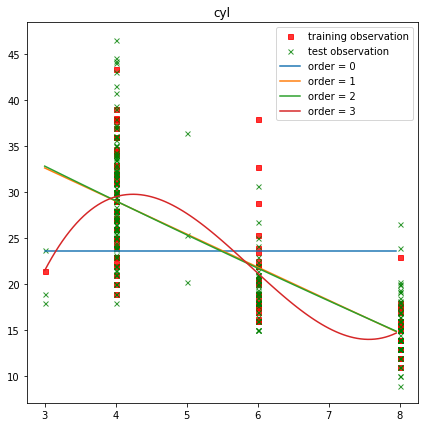

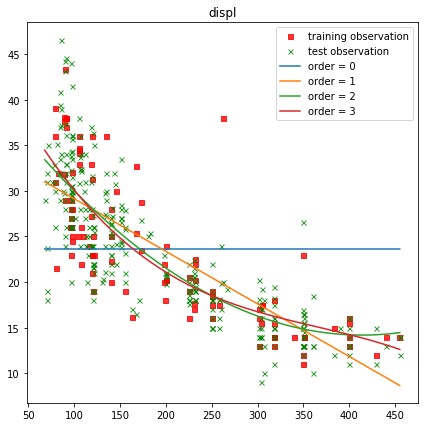

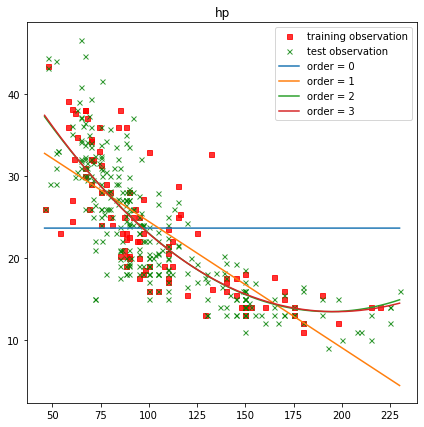

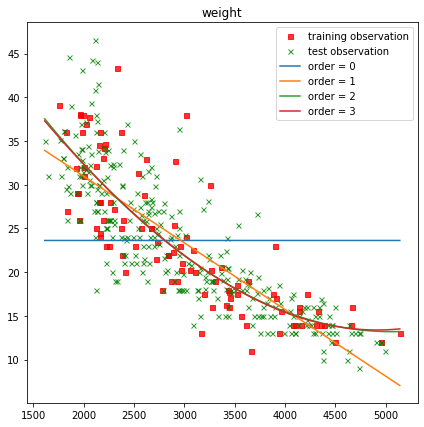

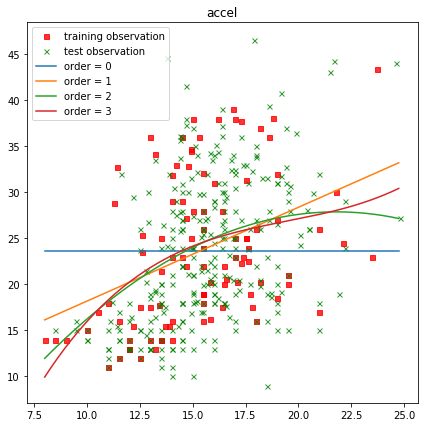

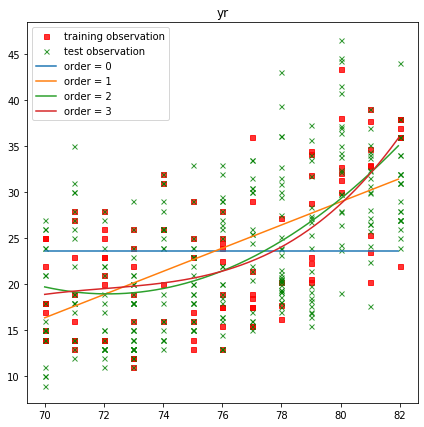

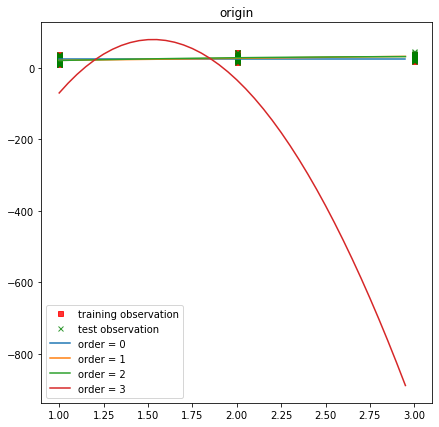

In [51]:
mysim = lm_sim()
mysim.run(x_tr, x_te, y_tr, y_te)

-----------------

### 5. Use all the 7 variables and fit the model using up to seconde order.

In [52]:
class lm_sim2:
    def __init__(self):
        print('>>>> Simulator is initialized!!')

    def run(self, x_tr, x_te, y_tr, y_te):
        for o in [0,1 , 2]:
            print('------------------------------------')
            print('>>>> The order now is {}'.format(o))
            lm = lm_solver(order= o, p = 7)

            x_tr = np.array(x_tr).reshape(-1, 7)
            x_te = np.array(x_te).reshape(-1, 7)
            y_tr = np.array(y_tr).reshape(-1,1)
            y_te = np.array(y_te).reshape(-1,1)

            lm.fit(x_tr, y_tr)
            lm.get_mse()

            y_pred = lm.predict(x_te)
            mse_te = 1/len(y_te)*sum(np.square(y_te - y_pred))
            print('>>>> The testing MSE is {}'.format(mse_te[0]))

In [53]:
sim2 = lm_sim2()
sim2.run(x_tr, x_te, y_tr, y_te)

>>>> Simulator is initialized!!
------------------------------------
>>>> The order now is 0
>>>> Linear regressor is successfully initialized!!
>>>> The MSE for the trainning model is : 62.322624
>>>> The testing MSE is 60.271104767123234
------------------------------------
>>>> The order now is 1
>>>> Linear regressor is successfully initialized!!
>>>> The MSE for the trainning model is : 10.54251443718317
>>>> The testing MSE is 12.938040198180296
------------------------------------
>>>> The order now is 2
>>>> Linear regressor is successfully initialized!!
>>>> The MSE for the trainning model is : 6.808767139295484
>>>> The testing MSE is 8.58804721962316


### 6. Logistic regression

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
clf = LogisticRegression(solver = 'lbfgs', multi_class= 'auto', max_iter=5000, random_state=256)
clf.fit(x_tr, strat_tr.mpg_level)
clf.score(x_tr, strat_tr.mpg_level )

0.79

In [56]:
clf.score(x_te, strat_te.mpg_level)

0.7328767123287672

### 7. Logistic regrssion with MinMax scalar.

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scalar = MinMaxScaler()
x_tr2 = scalar.fit(x_tr).transform(x_tr)
x_te2 = scalar.fit(x_te).transform(x_te)

In [59]:
clf2 = LogisticRegression(solver = 'lbfgs', multi_class= 'auto', random_state=256)
clf2.fit(x_tr2, strat_tr.mpg_level)
clf2.score(x_tr2, strat_tr.mpg_level )

0.76

In [60]:
clf2.score(x_te2, strat_te.mpg_level)

0.6746575342465754

### 8. Prediction

In [61]:
x = np.array([4, 400, 150, 3500, 8, 81, 1]).reshape(1,-1)
clf.predict(x)

array(['medium'], dtype=object)

In [62]:
lm = lm_solver(order= 2, p = 7)

x_tr = np.array(x_tr).reshape(-1, 7)
y_tr = np.array(y_tr).reshape(-1,1)

lm.fit(x_tr, y_tr)
lm.predict(x)

>>>> Linear regressor is successfully initialized!!


array([[27.70292378]])